In [242]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math


<h2 style="color:red;font-size:32px;">Recherche d'un extremum de la fonction objectif :</h2>


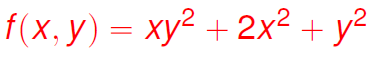

Text(0.5, 0.92, 'f(x,y)')

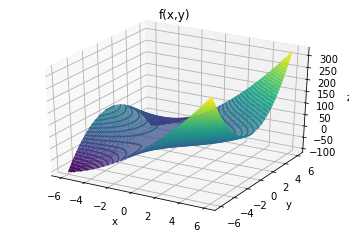

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def f(x, y):
    return x*y**2 + 2 * x**2 + y**2

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', edgecolor='none')   
ax.set_title('f(x,y)')
#fig = plt.figure(figsize=(20,20))

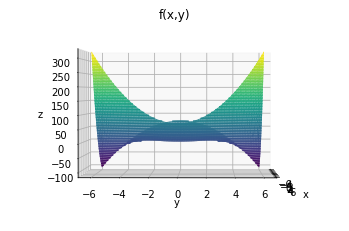

In [49]:
ax.view_init(1, 1)
fig

<h2 style="color:blue;font-size:32px;">Dévivées secondes :</h2>

In [93]:
from sympy import init_printing
init_printing()
x = sp.Symbol('x') 
y = sp.Symbol('y')
expr = x * y**2 + 2 * x**2 + y**2

d2f_d2x = sp.diff(z,x,x)
d2f_d2y = sp.diff(z,y,y)
d2f_dxy = sp.diff(z,y,x)

display("f(x,y) = ",expr)
display("dérivée seconde partielle d2f(x,y)/d2x :",d2f_d2x)
display("dérivée seconde partielle d2f(x,y)/d2y:",d2f_d2y)
display("dérivée seconde partielle d2f(x,y)/dxy:",d2f_dxy)


'f(x,y) = '

'dérivée seconde partielle d2f(x,y)/d2x :'

'dérivée seconde partielle d2f(x,y)/d2y:'

'dérivée seconde partielle d2f(x,y)/dxy:'

In [97]:
from sympy import *
m = Matrix([[d2f_d2x, d2f_dxy],[d2f_dxy,d2f_d2y,]])

<br><h2 style="color:blue;font-size:32px;">Matrice Hessienne :</h2>

In [254]:
display(m)


⎡ 4      2⋅y   ⎤
⎢              ⎥
⎣2⋅y  2⋅(x + 1)⎦

<br><h3> <h2 style="color:blue;font-size:32px;">Points critiques (x,y) : df/dx = df/dy = 0 :</h2>

In [99]:
df_dx = sp.diff(z,x)
df_dy = sp.diff(z,y)

In [121]:
display("dérivée prémière df/dx =",df_dx)
display("dérivée prémière df/dy =",df_dy)

'dérivée prémière df/dx ='

'dérivée prémière df/dy ='

In [176]:
sol = solve([ 4*x + y**2, 2*x*y + 2*y], dict=True)
display("les points critiques sont : ",sol)


'les points critiques sont : '

In [265]:
df_det = pd.DataFrame(sol)
expr = det(m)

for i in range(0,len(df)):
    
    t=expr.subs([(x,df_det.iloc[i,0]),(y,df_det.iloc[i,1])])
    if t < 0:
        display(sol[i],"déterminant de l'Hessienne est négative, ce n'est pas un point critique")
    else :
        display(sol[i],"déterminant de l'Hessienne est positive, c'est un point critique")
        if m[0,0].subs([(x,df_det.iloc[i,0]),(y,df_det.iloc[i,1])]) + m[1,1].subs([(x,df_det.iloc[i,0]),(y,df_det.iloc[i,1])])>0:
            display("trace de l'Hessienne est positive, c'est un minimum local")
        else:
            display("trace de l'Hessienne est négative, c'est un maximum local")
            


"déterminant de l'Hessienne est négative, ce n'est pas un point critique"

"déterminant de l'Hessienne est négative, ce n'est pas un point critique"

"déterminant de l'Hessienne est positive, c'est un point critique"

"trace de l'Hessienne est positive, c'est un minimum local"